In [ ]:
# Find the "Magic" number of electrons - Fill out the Fermi Shell
# I'm sure there is more elegant math to formulate this but lets scan and plot it out

In [9]:
import numpy as np
from ueg import my_ueg
# scan the N cutoff from 1 to 3 to find the magic numbers
magic_num = np.array([])
n_list = np.arange(1,3,0.01)
len_list = np.empty(len(n_list),dtype=int)
for i,n in enumerate(n_list):
    mu = my_ueg(rs=1, nelec=(7,7)) # these numbers do not matter
    npts = mu.get_npts(N_cut=n, with_zero=True) # generate a spherical integer grid |n| < N_cut
    len_list[i] = int(len(npts)) # number of grid points
    n_max = np.sqrt(np.sum(npts[-1]**2)) # the npoints are arranged in increasing order of |n|
    if len_list[i] > len_list[i-1]: # when the number of npoints increases, print out the info
        magic_num = np.hstack([magic_num,[len_list[i-1]]])
        print(len_list[i-1],len_list[i],n_max) # this are the magic numbers [7,19,27,33,57,81,93,...]

7 19 1.4142135623730951
19 27 1.7320508075688772
27 33 2.0
33 57 2.23606797749979
57 81 2.449489742783178
81 93 2.8284271247461903


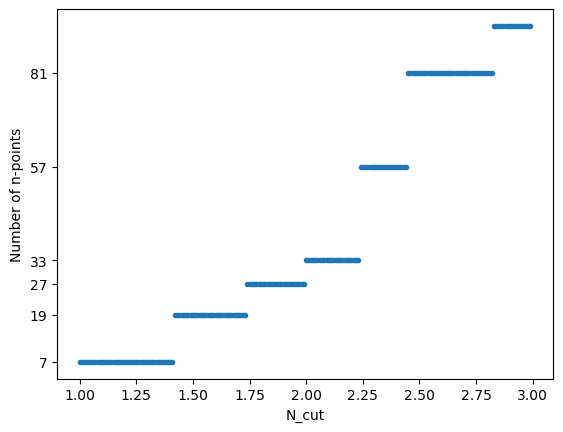

In [11]:
import matplotlib.pyplot as plt
plt.plot(n_list,len_list,'.')
plt.xlabel('N_cut')
plt.ylabel('Number of n-points')
plt.yticks(magic_num)
plt.show()

In [5]:
# find the highest occupied states |momentum| and compare it to k_fermi at L->inf
n_list = np.arange(6,5000,20)
k_list = np.empty(n_list.shape)
for i,n in enumerate(n_list):
    mu = my_ueg(rs=1, nelec=(n//2,n//2))
    ks = mu.get_kpts(gamma=1.414, with_zero=True)
    k_abs = np.sqrt(np.sum(ks**2, axis=1))
    k_list[i] = k_abs[n//2-1]

K Fermi (rs=1):  1.9191582926775128


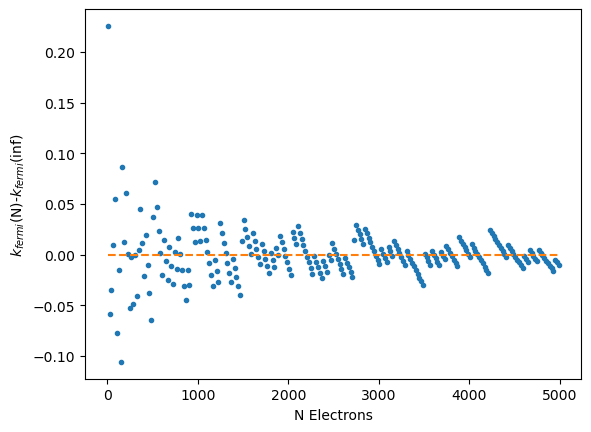

In [7]:
# True Fermi level for rs=1 vs. Fermi level by filling up discrete k-space
kf = (9*np.pi/4)**(1/3) # k_fermi for rs=1
print('K Fermi (rs=1): ', kf)

import matplotlib.pyplot as plt
plt.plot(n_list,k_list-kf,'.')
plt.plot(n_list,[0]*len(n_list),'--')
plt.xlabel('N Electrons')
plt.ylabel('$k_{fermi}$(N)-$k_{fermi}$(inf)')
plt.show()

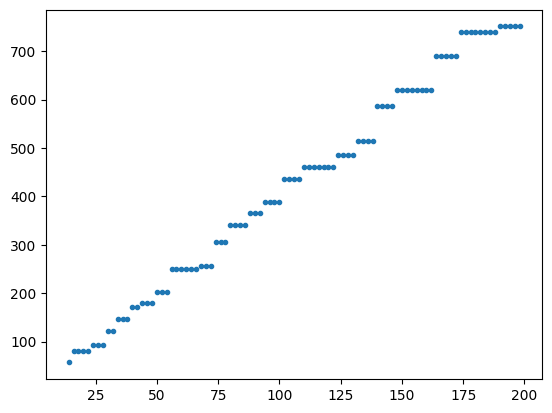

In [ ]:
# use gamma=2, get about 2^3/2 = 4x (for restricted case) the num of states (kpts) vs. particles
n_list = np.arange(7,100)
nkpts = np.empty(n_list.shape)
for i,n in enumerate(n_list):
    mu = my_ueg(rs=1, nelec=(n,n))
    nkpts[i] = mu.get_kpts(gamma=2).shape[0] # K_cut = gamma*K_Fermi

plt.plot(2*n_list,nkpts,'.')
plt.show()

number of k-points 57


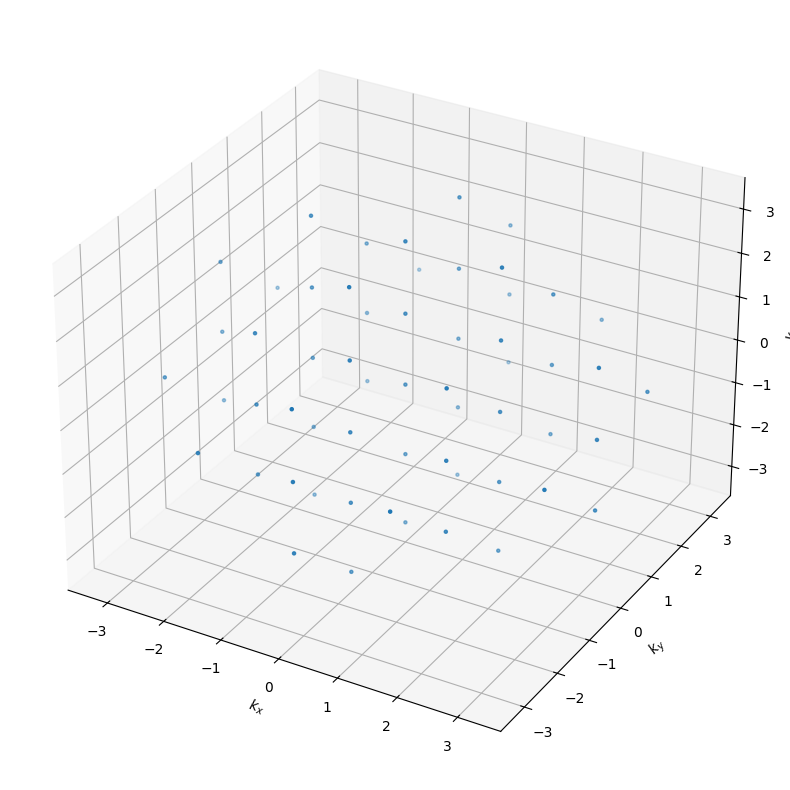

In [14]:
# Visualize the k-points in the Fermi Sphere for rs=1, N=14
mu = my_ueg(rs=1, nelec=(7,7))
k_sphere = ks = mu.get_kpts(gamma=2, with_zero=True) # K_cut = gamma*K_Fermi
print('number of k-points', k_sphere.shape[0])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(k_sphere[:,0], k_sphere[:,1], k_sphere[:,2], s=5)
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
ax.set_zlabel(r'$k_z$')

plt.show()